<a href="https://colab.research.google.com/github/roshanharip/Ecommerce-Recommended-System/blob/main/Ecommerce_Recommended_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ecommerce Recommended System

##Import Dataset

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d irvifa/amazon-product-reviews
!unzip amazon-product-reviews.zip
!rm -rf amazon-product-reviews.zip

Dataset URL: https://www.kaggle.com/datasets/irvifa/amazon-product-reviews
License(s): unknown
 99% 108M/109M [00:03<00:00, 38.8MB/s]
100% 109M/109M [00:04<00:00, 28.7MB/s]
Archive:  amazon-product-reviews.zip
  inflating: ratings_Electronics.csv  


## IMPORT NECESSARY PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#@title Import File
df = pd.read_csv('ratings_Electronics.csv', names=['userId','productId', 'Rating','timestamp'])
df.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


##DATA PREPROCESSING

In [ ]:
df.shape

(7824482, 4)

In [ ]:
int(7824482*0.2)

1564896

In [ ]:
elec_df = df.sample(n=1564896, ignore_index=True)

In [ ]:
del df

In [ ]:
elec_df.head()

,userId,productId,Rating,timestamp
0,A1SSHESD12PWZ8,B000U9XMCE,1.0,1200873600
1,A2XXVOZTWG4VS6,B004QJKO52,3.0,1331769600
2,A2AOGRVZRPCXME,B0083DK98E,2.0,1353628800
3,A2RDH1D9FK05V0,B009DKBBJ2,5.0,1399852800
4,A36OQE3RAOO63J,B003YE23JU,5.0,1390435200


In [ ]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   Rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [ ]:
elec_df.drop('timestamp', axis=1, inplace=True)
elec_df.describe()

,Rating
count,1.564896e+06
mean,4.013122e+00
std,1.380741e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [ ]:
elec_df.isnull().sum()

,0
userId,0
productId,0
Rating,0


In [ ]:
elec_df.duplicated().sum()

0

In [ ]:
elec_df.head()

,userId,productId,Rating
0,A1SSHESD12PWZ8,B000U9XMCE,1.0
1,A2XXVOZTWG4VS6,B004QJKO52,3.0
2,A2AOGRVZRPCXME,B0083DK98E,2.0
3,A2RDH1D9FK05V0,B009DKBBJ2,5.0
4,A36OQE3RAOO63J,B003YE23JU,5.0


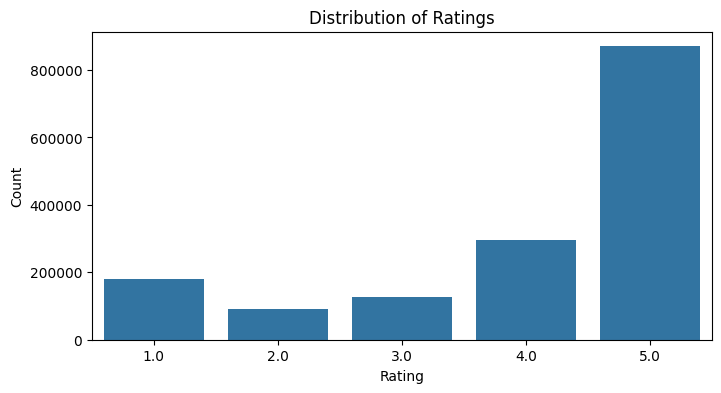

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Rating', data=elec_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
print(f"TOtal Rating : {elec_df.shape[0]}")
print(f"Total User : {elec_df['userId'].nunique()}")
print(f"Total Product : {elec_df['productId'].nunique()}")

TOtal Rating : 1564896
Total User : 1226612
Total Product : 237833


In [ ]:
no_of_rated_product_per_user = elec_df.groupby(by='userId')['Rating'].count().sort_values(ascending=False)
no_of_rated_product_per_user.head()

,Rating
userId,
ADLVFFE4VBT8,103
A5JLAU2ARJ0BO,101
A3OXHLG6DIBRW8,84
A680RUE1FDO8B,78
A6FIAB28IS79,76


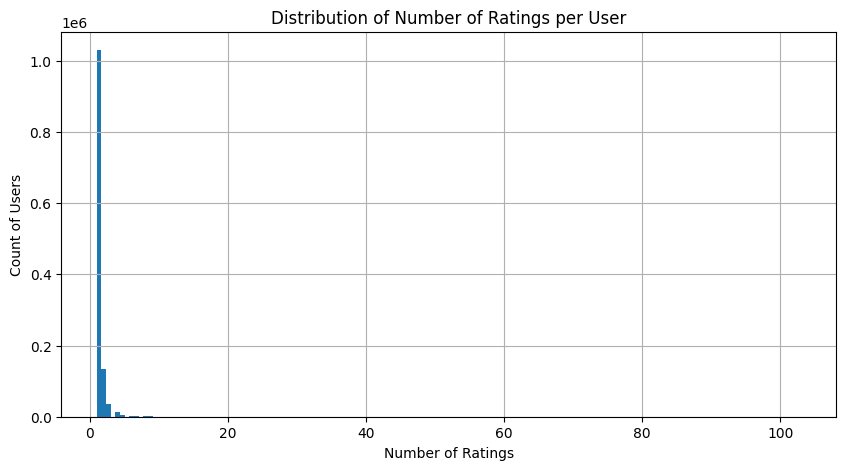

In [ ]:
# prompt: graph of no_of_rated_product_per_user

plt.figure(figsize=(10,5))
no_of_rated_product_per_user.hist(bins=150)
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()


In [ ]:
print(f"No of rated product more than 50 per user :  {sum(no_of_rated_product_per_user >= 50)}")

No of rated product more than 50 per user :  27


##POPULARITY BASED RECOMMENDATION

In [ ]:
data = elec_df.groupby(by=['productId']).filter(lambda x: x['Rating'].count() >= 50)
data.head()

,userId,productId,Rating
0,A1SSHESD12PWZ8,B000U9XMCE,1.0
6,A1BBSZPBOOSYPF,B000CLNHXY,3.0
10,A21CCWK6ZZRLE2,B001ELK2NY,5.0
11,A3JN87N2FKM519,B003ES5ZUU,5.0
12,ASNW8MGNC91D2,B0098Y90PK,5.0


In [ ]:
no_of_rating_per_product = data.groupby(by='productId')['Rating'].count().sort_values(ascending=False)
no_of_rating_per_product

,Rating
productId,
B0074BW614,3615
B00DR0PDNE,3286
B007WTAJTO,2848
B006GWO5WK,2467
B0019EHU8G,2428
...,...
B005KFHVES,50
B005LFT40G,50
B00001W0DI,50


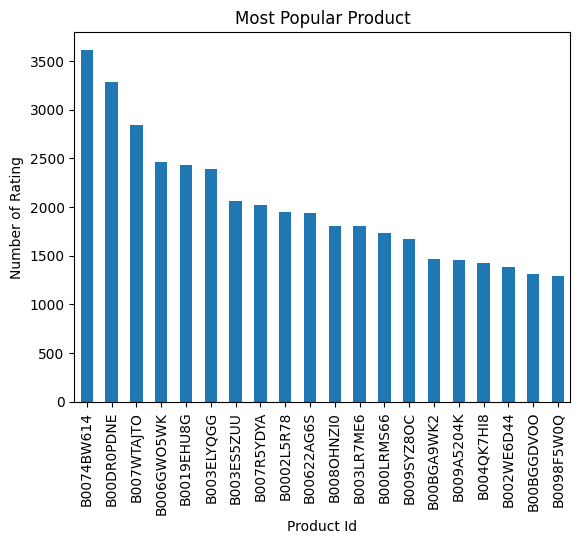

In [ ]:
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product Id')
plt.ylabel('Number of Rating')
plt.title('Most Popular Product')
plt.show()

In [ ]:
mean_rating_product_count = pd.DataFrame(data.groupby(by='productId')['Rating'].mean())
mean_rating_product_count.head()

,Rating
productId,
0972683275,4.405660
1400501466,3.547170
1400532655,3.702381
140053271X,3.864583
B00000DM9W,4.593220


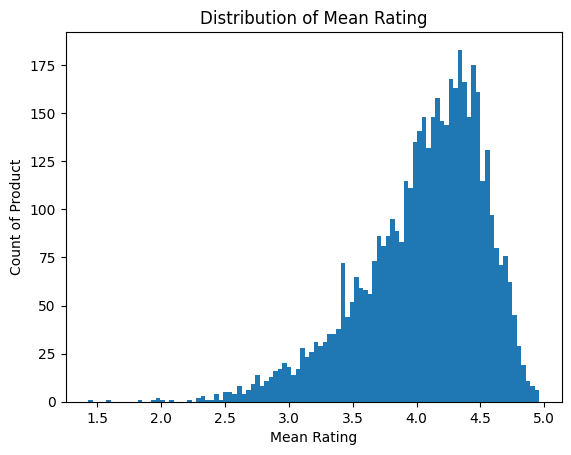

In [ ]:
plt.hist(mean_rating_product_count['Rating'], bins=100)
plt.xlabel('Mean Rating')
plt.ylabel('Count of Product')
plt.title('Distribution of Mean Rating')
plt.show()

In [ ]:
mean_rating_product_count['Rating'].skew()

-0.9461242629751511

In [ ]:
mean_rating_product_count["Rating_Count"] = pd.DataFrame(data.groupby(by='productId')['Rating'].count())
mean_rating_product_count.head()

,Rating,Rating_Count
productId,,
0972683275,4.405660,212
1400501466,3.547170,53
1400532655,3.702381,84
140053271X,3.864583,96
B00000DM9W,4.593220,59


In [ ]:
mean_rating_product_count[mean_rating_product_count['Rating_Count'] == mean_rating_product_count['Rating_Count'].max() ]

,Rating,Rating_Count
productId,,
B0074BW614,4.46473,3615


In [ ]:
print('Min Average rating product : ', mean_rating_product_count['Rating_Count'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['Rating_Count'] == mean_rating_product_count['Rating_Count'].min()]['Rating'].sum())

Min Average rating product :  50
total min average rating products :  411.49999999999994


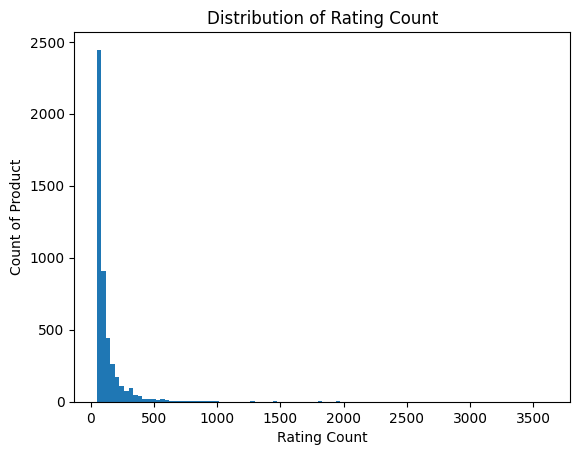

In [ ]:
plt.hist(mean_rating_product_count['Rating_Count'], bins=100)
plt.xlabel('Rating Count')
plt.ylabel('Count of Product')
plt.title('Distribution of Rating Count')
plt.show()

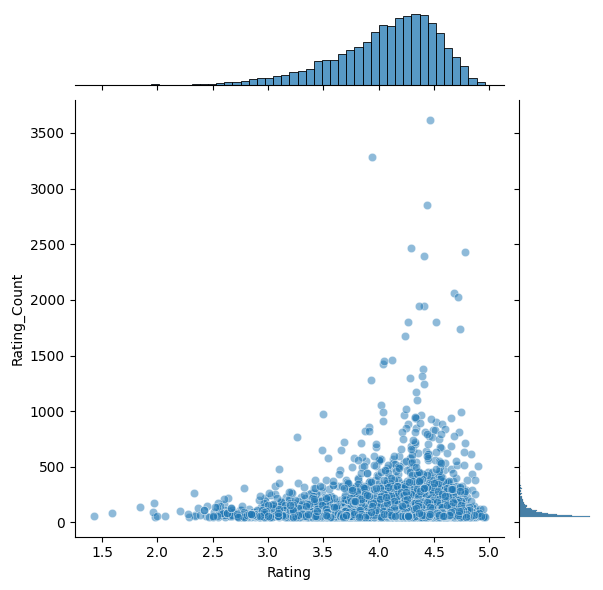

In [ ]:
sns.jointplot(x='Rating', y='Rating_Count', data=mean_rating_product_count, alpha=0.5)
plt.show()

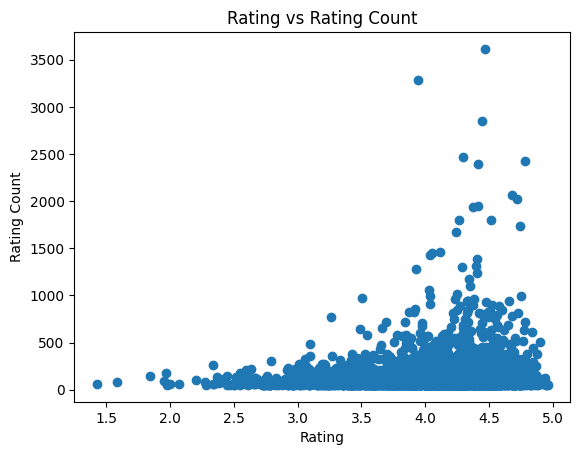

In [ ]:
plt.scatter(x='Rating', y='Rating_Count', data=mean_rating_product_count)
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.title('Rating vs Rating Count')
plt.show()

In [ ]:
print('Corelation between Rating and Rating Count : ', mean_rating_product_count['Rating'].corr(mean_rating_product_count['Rating_Count']))

Corelation between Rating and Rating Count :  0.11549188863372511


###COLLABARATIVE FILTERING (ITEM - ITEM RECOMMENDATION)

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357282 sha256=dddc7be75cf50934f37b0cf82ddb78c7c6b3cc45c9fbd448ea2d08861887a225
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import KNNWithMeans, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [ ]:
reader = Reader(rating_scale=(1,5))
surprise_data = Dataset.load_from_df(data, reader)

In [ ]:
trainset , testset = train_test_split(surprise_data, test_size=0.3, random_state=42)
model = KNNWithMeans(k=5, sim_options={'name':'pearson_baseline', 'user_based':False})
model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
test_pred = model.test(testset)

In [ ]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 1.3112


1.311247235486659

##Model Based Collabarative Filtering System


In [ ]:
data2 = data.sample(20000)
rating_matrix = data2.pivot_table(index='userId', columns='productId', values='Rating', fill_value=0)
rating_matrix.head()

productId,0972683275,1400501466,1400532655,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JI4F,B00000K2YR,B00001P4XA,...,B00HRO3IBA,B00HTPHK5W,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00IDG3IDO,B00IF70QCW,B00INNP5VU,B00IO1V33U,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A00439582LP7GOSGMC3I9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00473363TJ8YSZ3YAGG9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0104223HJG1ML8O05C0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0110255Y4ER0RTKEKXS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01741122WEVIHH0GTQTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rating_matrix.shape

(19879, 4368)

In [ ]:
x_rating_matrix = rating_matrix.T
x_rating_matrix.head()

userId,A00439582LP7GOSGMC3I9,A00473363TJ8YSZ3YAGG9,A0104223HJG1ML8O05C0,A0110255Y4ER0RTKEKXS,A01741122WEVIHH0GTQTS,A01895043HM1KLEGMYQWR,A02172733LZJV9DKGN4I1,A03154431CCYFPYG2G4R8,A03215203LE0OBSNBQ9E7,A032164427Y3WOJ9JY509,...,AZXLO2XNHPXT9,AZXSRL8NLOWG4,AZY7BTWGWYYBK,AZYD3A1ADY85H,AZYH32578YZBF,AZYOVGJLQ03ML,AZYYK3M5TO7E0,AZZEHFWES5IUD,AZZFRY8O72WH8,AZZHWMXF7R1R9
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000DM9W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_rating_matrix.shape

(4368, 19879)

In [ ]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
matrix = SVD.fit_transform(x_rating_matrix)
matrix.shape

(4368, 10)

In [ ]:
correlation_matrix = np.corrcoef(matrix)
correlation_matrix.shape

(4368, 4368)

In [ ]:
x_rating_matrix.index[10]

'B00001P4XH'

In [ ]:
i="B00001P4XH"
product_names = list(x_rating_matrix.index)
product_id = product_names.index(i)
product_id


10

In [ ]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4368,)

In [ ]:
correlation_matrix[correlation_product_ID>0.85].shape

(191, 4368)

In [ ]:
recommend = list(x_rating_matrix.index[correlation_product_ID>0.85])
# recommend.remove(i)
recommend[0:20]

['B00001P4XH',
 'B00001P4ZR',
 'B000053HH5',
 'B00005AXHW',
 'B00005T3N3',
 'B00006BBAC',
 'B00006HSML',
 'B00007GQLU',
 'B00007IFED',
 'B00008AWKZ',
 'B00008VF63',
 'B00009UT9B',
 'B00009W3TY',
 'B0002WPSBC',
 'B00065L5TE',
 'B0006I09OS',
 'B0009K9FZW',
 'B0009S5HQA',
 'B0009YJXMS',
 'B000AM8SK2']